In [293]:
import pandas as pd
import numpy as np  
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats
from plotly.subplots import make_subplots
from datetime import datetime
import seaborn as sns
data=pd.read_csv('Weather.csv',index_col=0)

In [295]:
# Changing the table format
df = pd.melt(data, id_vars='YEAR', value_vars=data.columns[1:])
column_names_new = {'YEAR': 'Year',
                    'variable': 'Month', 'value': 'Temperature'}
df.rename(columns=column_names_new, inplace=True)
df.head(1)

,Year,Month,Temperature
0,1901,JAN,17.99


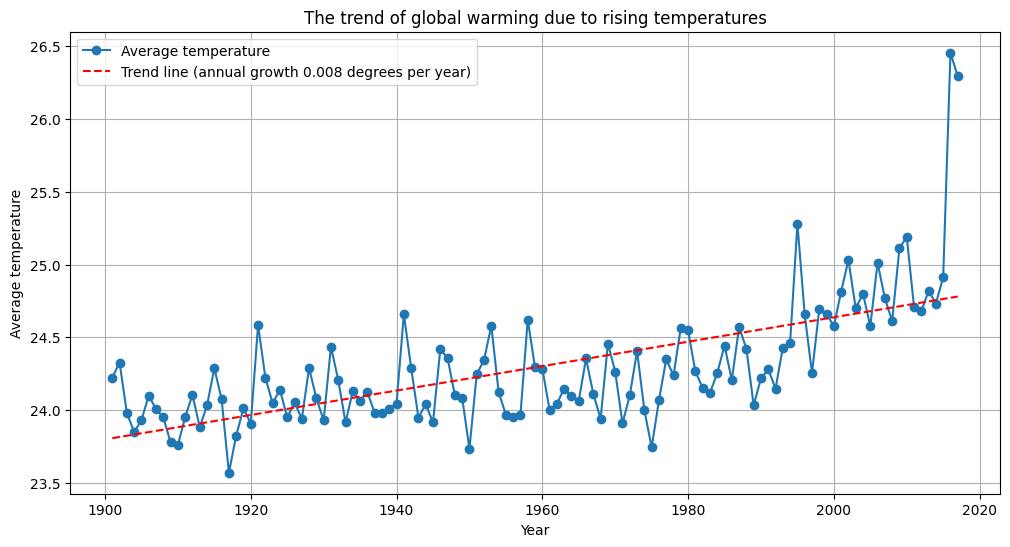

In [296]:
# Visualization of temperature by year
yearly_mean = df.groupby('Year')['Temperature'].mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_mean.index, yearly_mean.values, marker='o',
         linestyle='-', label='Average temperature')
slope, intercept, r_value, p_value, std_err = stats.linregress(
    yearly_mean.index, yearly_mean.values)
trend_line = intercept + slope * yearly_mean.index

plt.plot(yearly_mean.index, trend_line, 'r--',
         label=f'Trend line (annual growth {slope:.3f} degrees per year)')

plt.title('The trend of global warming due to rising temperatures')
plt.xlabel('Year')
plt.ylabel('Average temperature')
plt.grid(True)
plt.legend()
plt.show()


In [297]:
# visualization of each month by year
fig = px.box(df, 'Month', 'Temperature',
             title='Warmest, Coldest and Median Monthly Temperature')
fig.update_layout(width=1200, height=600)
fig.show()
px.scatter(df, 'Month', 'Temperature',
           size='Temperature', animation_frame='Year')


In [298]:
# visualization of each month by year
fig = px.line(df, x='Year', y='Temperature',
              facet_col='Month', facet_col_wrap=3)
fig.update_layout(title='Monthly temperature throughout history')

fig.update_layout(width=1150, height=1200)
fig.show()


In [300]:
# prediction of weather
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
df.drop('Year',axis=1,inplace=True)
for train_index, test_index in split.split(df, df["Month"]):
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]

strat_train_set = pd.get_dummies(strat_train_set)
strat_test_set = pd.get_dummies(strat_test_set)

X_train = strat_train_set.drop('Temperature', axis=1)
y_train = strat_train_set.Temperature
X_test = strat_test_set.drop('Temperature', axis=1)
y_test = strat_test_set.Temperature

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"(MAE): {mae}")
print(f"(MSE): {mse}")
print(f"(R^2): {r2}")


(MAE): 0.43191717443342226
(MSE): 0.3225302657037267
(R^2): 0.9737884829371249
